In [1]:
import numpy
import netCDF4
import matplotlib
import matplotlib.pyplot as mp
import datetime
import scipy

mp.rcParams.update({'mathtext.default': 'regular'})

import matplotlib.patches
import matplotlib.ticker

import mpl_toolkits.axes_grid1
import cartopy

DEGREE_SIGN = u'\u00B0'

% matplotlib inline

In [2]:
season='FMAASO'

data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/METGRID_FILES_RAW_OUTPUT/'+season+'/'
filename00 = data_dir+'met_em.d01.1979-01-01_00:00:00.nc'
filename06 = data_dir+'met_em.d01.1979-01-01_06:00:00.nc'
filename12 = data_dir+'met_em.d01.1979-01-01_12:00:00.nc'
filename18 = data_dir+'met_em.d01.1979-01-01_18:00:00.nc'
ncfile00 = netCDF4.Dataset(filename00, 'r', 'NetCDF4')
ncfile06 = netCDF4.Dataset(filename06, 'r', 'NetCDF4')
ncfile12 = netCDF4.Dataset(filename12, 'r', 'NetCDF4')
ncfile18 = netCDF4.Dataset(filename18, 'r', 'NetCDF4')
ncfile_list = [ncfile00,ncfile06,ncfile12,ncfile18]

XLAT_M = ncfile00.variables['XLAT_M'][0,:,:]
XLONG_M = ncfile00.variables['XLONG_M'][0,:,:]
XLAT_U = ncfile00.variables['XLAT_U'][0,:,:]
XLONG_U = ncfile00.variables['XLONG_U'][0,:,:]
XLAT_V = ncfile00.variables['XLAT_V'][0,:,:]
XLONG_V = ncfile00.variables['XLONG_V'][0,:,:]
LANDMASK = ncfile00.variables['LANDMASK'][0,:,:]

# IMPORT RAINNC

In [3]:
skintemp_list = [file.variables['SKINTEMP'][0,:,:]-273.15 for file in ncfile_list]
skintemp_mean = numpy.mean(numpy.array(skintemp_list), axis=0)

# IMPORT UU,VV FOR THIS SEASON

In [139]:
uu850_list = [file.variables['UU'][0,3,:,:] for file in ncfile_list]
uu850_mean_FMAASO = numpy.mean(numpy.array(uu850_list), axis=0)

vv850_list = [file.variables['VV'][0,3,:,:] for file in ncfile_list]
vv850_mean_FMAASO = numpy.mean(numpy.array(vv850_list), axis=0)

# NDJ

In [143]:
season='NDJ'

data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/METGRID_FILES_RAW_OUTPUT/'+season+'/'
filename00 = data_dir+'met_em.d01.1979-01-01_00:00:00.nc'
filename06 = data_dir+'met_em.d01.1979-01-01_06:00:00.nc'
filename12 = data_dir+'met_em.d01.1979-01-01_12:00:00.nc'
filename18 = data_dir+'met_em.d01.1979-01-01_18:00:00.nc'
ncfile00 = netCDF4.Dataset(filename00, 'r', 'NetCDF4')
ncfile06 = netCDF4.Dataset(filename06, 'r', 'NetCDF4')
ncfile12 = netCDF4.Dataset(filename12, 'r', 'NetCDF4')
ncfile18 = netCDF4.Dataset(filename18, 'r', 'NetCDF4')
ncfile_list = [ncfile00,ncfile06,ncfile12,ncfile18]

# XLAT_M = ncfile00.variables['XLAT_M'][0,:,:]
# XLONG_M = ncfile00.variables['XLONG_M'][0,:,:]
# XLAT_U = ncfile00.variables['XLAT_U'][0,:,:]
# XLONG_U = ncfile00.variables['XLONG_U'][0,:,:]
# XLAT_V = ncfile00.variables['XLAT_V'][0,:,:]
# XLONG_V = ncfile00.variables['XLONG_V'][0,:,:]
# LANDMASK = ncfile00.variables['LANDMASK'][0,:,:]

In [144]:
uu850_list = [file.variables['UU'][0,3,:,:] for file in ncfile_list]
uu850_mean_NDJ = numpy.mean(numpy.array(uu850_list), axis=0)

vv850_list = [file.variables['VV'][0,3,:,:] for file in ncfile_list]
vv850_mean_NDJ = numpy.mean(numpy.array(vv850_list), axis=0)

# MJJ

In [145]:
season='MJJ'

data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/METGRID_FILES_RAW_OUTPUT/'+season+'/'
filename00 = data_dir+'met_em.d01.1979-01-01_00:00:00.nc'
filename06 = data_dir+'met_em.d01.1979-01-01_06:00:00.nc'
filename12 = data_dir+'met_em.d01.1979-01-01_12:00:00.nc'
filename18 = data_dir+'met_em.d01.1979-01-01_18:00:00.nc'
ncfile00 = netCDF4.Dataset(filename00, 'r', 'NetCDF4')
ncfile06 = netCDF4.Dataset(filename06, 'r', 'NetCDF4')
ncfile12 = netCDF4.Dataset(filename12, 'r', 'NetCDF4')
ncfile18 = netCDF4.Dataset(filename18, 'r', 'NetCDF4')
ncfile_list = [ncfile00,ncfile06,ncfile12,ncfile18]

# XLAT_M = ncfile00.variables['XLAT_M'][0,:,:]
# XLONG_M = ncfile00.variables['XLONG_M'][0,:,:]
# XLAT_U = ncfile00.variables['XLAT_U'][0,:,:]
# XLONG_U = ncfile00.variables['XLONG_U'][0,:,:]
# XLAT_V = ncfile00.variables['XLAT_V'][0,:,:]
# XLONG_V = ncfile00.variables['XLONG_V'][0,:,:]
# LANDMASK = ncfile00.variables['LANDMASK'][0,:,:]

In [146]:
uu850_list = [file.variables['UU'][0,3,:,:] for file in ncfile_list]
uu850_mean_MJJ = numpy.mean(numpy.array(uu850_list), axis=0)

vv850_list = [file.variables['VV'][0,3,:,:] for file in ncfile_list]
vv850_mean_MJJ = numpy.mean(numpy.array(vv850_list), axis=0)

# OBS PRECIP DATA

In [8]:
precip_ncfile_name = '/Users/baird/Dropbox/_data_observations/GPCP/precip.mon.mean.nc'
ncfile_gpcp = netCDF4.Dataset(precip_ncfile_name)
data_gpcp = ncfile_gpcp.variables['precip'][:]
time_data_gpcp = ncfile_gpcp.variables['time'][:]
time_var_gpcp = ncfile_gpcp.variables['time']
lat_gpcp = ncfile_gpcp.variables['lat'][:]
lon_gpcp = ncfile_gpcp.variables['lon'][:]

In [9]:
time_gpcp_datetime = netCDF4.num2date(time_data_gpcp, time_var_gpcp.units, calendar='standard')
FMAASO_indices = [t.month in [2,3,4,8,9,10] for t in time_gpcp_datetime]
NDJ_indices = [t.month in [11,12,1] for t in time_gpcp_datetime]
MJJ_indices = [t.month in [5,6,7] for t in time_gpcp_datetime]

In [10]:
print(time_gpcp_datetime[0], time_gpcp_datetime[-1])

1979-01-01 00:00:00 2017-10-01 00:00:00


In [11]:
gpcp_FMAASO_mean = data_gpcp[FMAASO_indices,:,:].mean(axis=0)
gpcp_NDJ_mean = data_gpcp[NDJ_indices,:,:].mean(axis=0)
gpcp_MJJ_mean = data_gpcp[MJJ_indices,:,:].mean(axis=0)

# WRF PRECIP DATA AND WINDS DATA

In [12]:
xlat_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLAT.nc'
xlong_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLONG.nc'
landmask_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_LANDMASK.nc'
times_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_Times_ens_mean.nc'

data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/400/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

lh_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'LH' + filename_suffix)
rainc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'RAINC' + filename_suffix)
rainnc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'RAINNC' + filename_suffix)
t2_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'T2' + filename_suffix)
qfx_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QFX' + filename_suffix)

ecan_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'ECAN' + filename_suffix)
edir_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'EDIR' + filename_suffix)
etran_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'ETRAN' + filename_suffix)

#u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp.nc')
#v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp.nc')

time_var = time_ncfile.variables['Times']
time = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

lh_400 = lh_ncfile.variables['LH'][:]
rainc_400 = rainc_ncfile.variables['RAINC'][:]
rainnc_400 = rainnc_ncfile.variables['RAINNC'][:]
qfx_400 = qfx_ncfile.variables['QFX'][:]*86400.
t2_400 = t2_ncfile.variables['T2'][:]

ecan_400 = ecan_ncfile.variables['ECAN'][:]*86400.
edir_400 = edir_ncfile.variables['EDIR'][:]*86400.
etran_400 = etran_ncfile.variables['ETRAN'][:]*86400.

In [13]:
skip_time=24
raintot_400 = rainc_400+rainnc_400

raintot_400 = raintot_400[skip_time:,:,:]

raintot_400_diff = numpy.zeros((raintot_400.shape))*numpy.nan
raintot_400_diff[:-1,:,:] = numpy.diff(raintot_400, axis=0) * 24.

#raintot_400_diff[:,landmask==0] = numpy.nan
raintot_400_clim = numpy.nanmean(raintot_400_diff, axis=0)

# # monthly mean
# raintot_diffs_time_mean = numpy.nanmean(raintot_1000_diff[skip_time:,:,:] - raintot_400_diff[skip_time:,:,:], axis=0)
# raintot_diffs_time_mean_landmask = numpy.copy(raintot_diffs_time_mean)
# raintot_diffs_time_mean_landmask[landmask==0] = numpy.nan

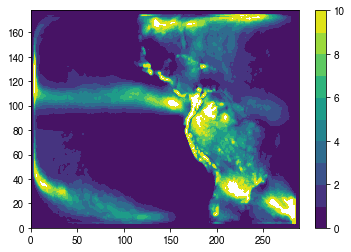

In [14]:
levels=numpy.arange(0,11,1)
cf=mp.contourf(raintot_400_clim, levels=levels)
mp.colorbar(cf)

In [15]:
# make color map
minval=0. # for inferno:  0.18
maxval=0.9 # for inferno: 1.0
n=256
full_cmap = mp.get_cmap('gist_earth_r')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))

# IMPORT SKINTEMP

In [16]:
skintemp_list = [file.variables['SKINTEMP'][0,:,:]-273.15 for file in ncfile_list]
skintemp_mean = numpy.mean(numpy.array(skintemp_list), axis=0)

# IMPORT UU,VV AT 850 hPa

Text(0.03,0.09,'skin temp.')

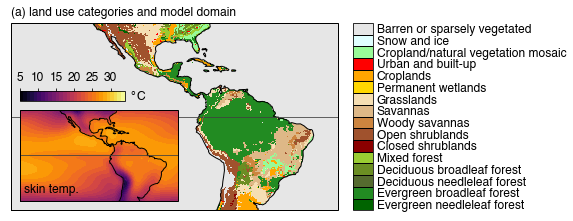

In [18]:
fontsize=12

levels = numpy.arange(-20,21,5)
fig = mp.figure(figsize=(5.5,3))

ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax.gridlines(ylocs=[0], color='0.25')
ax.coastlines(resolution='110m')
ax.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())

land_use_map = ax.pcolormesh(XLONG_M,XLAT_M,lu_index,cmap=categorical_cmap,vmin=1,vmax=17)

fig.tight_layout()
bbox_ax = ax.get_position()

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
#cbar_ax = divider.append_axes('right', size='3%', pad=0.25, map_projection=cartopy.crs.PlateCarree())
cbar_ax = fig.add_axes([bbox_ax.x1-0.02,bbox_ax.y0,0.05,bbox_ax.height])
cbar = fig.colorbar(land_use_map, cax=cbar_ax, drawedges=True)
cbar.dividers.set_color('0')
cbar.dividers.set_linewidth(1)
cbar.set_ticks(numpy.arange(1.5,16.6,1))
cbar.set_ticklabels(type_name)
# for t in cbar.ax.get_yticklabels():
#     #t.set_verticalalignment('center')
cbar.ax.tick_params(labelsize=fontsize, length=0)

ax.text(s='(a) land use categories and model domain', x=0, y=1.02, fontsize=fontsize, ha='left', va='bottom', transform=ax.transAxes)

levels=numpy.arange(5,35,1)
ax_small = fig.add_axes([0.11,0.07,0.4,0.5], projection=cartopy.crs.PlateCarree())
ax_small.gridlines(ylocs=[0], color='0.25')
ax_small.coastlines(resolution='110m')
ax_small.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
contour_plot = ax_small.contourf(XLONG_M, XLAT_M, skintemp_mean, levels=levels, cmap='inferno')

# colorbar
ax_pos = ax_small.get_position()
cbar_ax = fig.add_axes([ax_pos.x0,ax_pos.y1,ax_pos.width*0.666,0.05])
cbar = mp.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(280,301,5))
cbar_ax.text(s=DEGREE_SIGN+r'$\,$'+'C', x=1.2, y=0.5, ha='right', va='center', fontsize=fontsize)
cbar_ax.xaxis.set_ticks_position('top')
cbar.set_ticks(numpy.arange(5,31,5))
cbar_ax.text(s='skin temp.', x=0.03, y=0.09, transform=ax_small.transAxes, fontsize=fontsize, color='black')
#fig.savefig('land_use_domain_info.png', dpi=600, transparent=True, bbox_inches='tight')

In [19]:
xgrid,ygrid=numpy.meshgrid(lon_gpcp,lat_gpcp)
raintot_400_clim_interp = scipy.interpolate.griddata(points=(XLONG_M.ravel()+180., XLAT_M.ravel()), \
                                                     values=raintot_400_clim.ravel(), \
                                                     xi=(xgrid,ygrid), method='cubic')

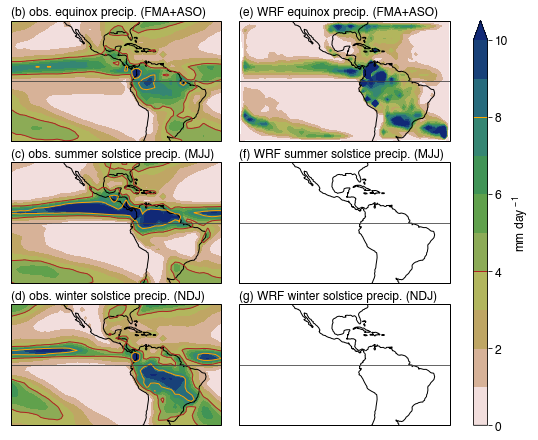

In [20]:
fig, ax_list = mp.subplots(ncols=2,nrows=3,subplot_kw={'projection': cartopy.crs.PlateCarree()})

fig.set_size_inches(6.5,6)
levels=numpy.arange(0,11,1)

ax_list[0,0].gridlines(ylocs=[0], color='0.25')
ax_list[0,0].coastlines(resolution='110m', lw=1)
ax_list[0,0].set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
contour_plot1 = ax_list[0,0].contourf(lon_gpcp, lat_gpcp, gpcp_FMAASO_mean, levels=levels, cmap=cmap_partial, extend='max')
contour_lines1 = ax_list[0,0].contour(lon_gpcp, lat_gpcp, gpcp_FMAASO_mean, levels=[4,8], colors=['firebrick','orange'], linewidths=[1])
ax_list[0,0].text(s='(b) obs. equinox precip. (FMA+ASO)', x=0, y=1.02, transform=ax_list[0,0].transAxes, ha='left', va='bottom', fontsize=fontsize)

ax_list[1,0].gridlines(ylocs=[0], color='0.25')
ax_list[1,0].coastlines(resolution='110m')
ax_list[1,0].set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
contour_plot2 = ax_list[1,0].contourf(lon_gpcp, lat_gpcp, gpcp_MJJ_mean, levels=levels, cmap=cmap_partial, extend='max')
contour_lines2 = ax_list[1,0].contour(lon_gpcp, lat_gpcp, gpcp_MJJ_mean, levels=[4,8], colors=['firebrick','orange'], linewidths=[1])
ax_list[1,0].text(s='(c) obs. summer solstice precip. (MJJ)', x=0, y=1.02, transform=ax_list[1,0].transAxes, ha='left', va='bottom', fontsize=fontsize)

ax_list[2,0].gridlines(ylocs=[0], color='0.25')
ax_list[2,0].coastlines(resolution='110m')
ax_list[2,0].set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
contour_plot3 = ax_list[2,0].contourf(lon_gpcp, lat_gpcp, gpcp_NDJ_mean, levels=levels, cmap=cmap_partial, extend='max')
contour_lines3 = ax_list[2,0].contour(lon_gpcp, lat_gpcp, gpcp_NDJ_mean, levels=[4,8], colors=['firebrick','orange'], linewidths=[1])
ax_list[2,0].text(s='(d) obs. winter solstice precip. (NDJ)', x=0, y=1.02, transform=ax_list[2,0].transAxes, ha='left', va='bottom', fontsize=fontsize)


ax_list[0,1].gridlines(ylocs=[0], color='0.25')
ax_list[0,1].coastlines(resolution='110m', lw=1)
ax_list[0,1].set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
#contour_plot4 = ax_list[0,1].contourf(XLONG_M, XLAT_M, raintot_400_clim, levels=levels, cmap=cmap_partial, extend='max')
contour_plot4 = ax_list[0,1].contourf(lon_gpcp-180., lat_gpcp, raintot_400_clim_interp, levels=levels, cmap=cmap_partial, extend='max')
#contour_lines1 = ax_list[0,1].contour(XLONG_M, XLAT_M, raintot_400_clim, levels=[4,8], colors=['firebrick'], linewidths=[2])
ax_list[0,1].text(s='(e) WRF equinox precip. (FMA+ASO)', x=0, y=1.02, transform=ax_list[0,1].transAxes, ha='left', va='bottom', fontsize=fontsize)

ax_list[1,1].gridlines(ylocs=[0], color='0.25')
ax_list[1,1].coastlines(resolution='110m')
ax_list[1,1].set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
#contour_plot5 = ax_list[1,1].contourf(lon_gpcp, lat_gpcp, gpcp_MJJ_mean, levels=levels, cmap=cmap_partial, extend='max')
#contour_lines2 = ax_list[1,1].contour(lon_gpcp, lat_gpcp, gpcp_MJJ_mean, levels=[4,8], colors=['firebrick'], linewidths=[2])
ax_list[1,1].text(s='(f) WRF summer solstice precip. (MJJ)', x=0, y=1.02, transform=ax_list[1,1].transAxes, ha='left', va='bottom', fontsize=fontsize)

ax_list[2,1].gridlines(ylocs=[0], color='0.25')
ax_list[2,1].coastlines(resolution='110m')
ax_list[2,1].set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
#contour_plot6 = ax_list[2,1].contourf(lon_gpcp, lat_gpcp, gpcp_NDJ_mean, levels=levels, cmap=cmap_partial, extend='max')
#contour_lines3 = ax_list[2,1].contour(lon_gpcp, lat_gpcp, gpcp_NDJ_mean, levels=[4,8], colors=['firebrick'], linewidths=[2])
ax_list[2,1].text(s='(g) WRF winter solstice precip. (NDJ)', x=0, y=1.02, transform=ax_list[2,1].transAxes, ha='left', va='bottom', fontsize=fontsize)



fig.tight_layout(h_pad=1.5)

ax_top = ax_list[0,1].get_position()
ax_bottom = ax_list[-1,1].get_position()
cbar_ax = fig.add_axes([ax_top.x1+0.05,ax_bottom.y0,0.03,ax_top.y1-ax_bottom.y0])
cbar = mp.colorbar(contour_plot1, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)
cbar.add_lines(contour_lines3)

# Plot together

Text(0.03,0.09,'skin temp.')

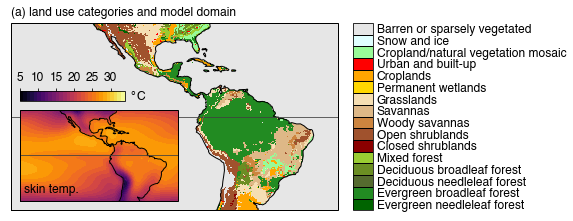

In [21]:
fontsize=12

levels = numpy.arange(-20,21,5)
fig = mp.figure(figsize=(5.5,3))

ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax.gridlines(ylocs=[0], color='0.25')
ax.coastlines(resolution='110m')
ax.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())

land_use_map = ax.pcolormesh(XLONG_M,XLAT_M,lu_index,cmap=categorical_cmap,vmin=1,vmax=17)

fig.tight_layout()
bbox_ax = ax.get_position()

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
#cbar_ax = divider.append_axes('right', size='3%', pad=0.25, map_projection=cartopy.crs.PlateCarree())
cbar_ax = fig.add_axes([bbox_ax.x1-0.02,bbox_ax.y0,0.05,bbox_ax.height])
cbar = fig.colorbar(land_use_map, cax=cbar_ax, drawedges=True)
cbar.dividers.set_color('0')
cbar.dividers.set_linewidth(1)
cbar.set_ticks(numpy.arange(1.5,16.6,1))
cbar.set_ticklabels(type_name)
# for t in cbar.ax.get_yticklabels():
#     #t.set_verticalalignment('center')
cbar.ax.tick_params(labelsize=fontsize, length=0)

ax.text(s='(a) land use categories and model domain', x=0, y=1.02, fontsize=fontsize, ha='left', va='bottom', transform=ax.transAxes)

levels=numpy.arange(5,35,1)
ax_small = fig.add_axes([0.11,0.07,0.4,0.5], projection=cartopy.crs.PlateCarree())
ax_small.gridlines(ylocs=[0], color='0.25')
ax_small.coastlines(resolution='110m')
ax_small.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
contour_plot = ax_small.contourf(XLONG_M, XLAT_M, skintemp_mean, levels=levels, cmap='inferno')

# colorbar
ax_pos = ax_small.get_position()
cbar_ax = fig.add_axes([ax_pos.x0,ax_pos.y1,ax_pos.width*0.666,0.05])
cbar = mp.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(280,301,5))
cbar_ax.text(s=DEGREE_SIGN+r'$\,$'+'C', x=1.2, y=0.5, ha='right', va='center', fontsize=fontsize)
cbar_ax.xaxis.set_ticks_position('top')
cbar.set_ticks(numpy.arange(5,31,5))
cbar_ax.text(s='skin temp.', x=0.03, y=0.09, transform=ax_small.transAxes, fontsize=fontsize, color='black')
#fig.savefig('land_use_domain_info.png', dpi=600, transparent=True, bbox_inches='tight')

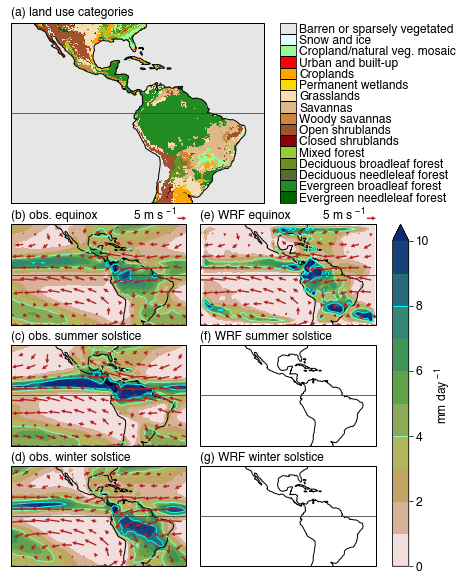

In [187]:
fontsize = 12

fig = mp.figure(figsize=(7.5,10))

gs1 = matplotlib.gridspec.GridSpec(1,7)
ax1 = mp.subplot(gs1[0:5], projection=cartopy.crs.PlateCarree())
gs1.update(bottom=0.63)

levels = numpy.arange(-20,21,5)
ax1.gridlines(ylocs=[0], color='0.25')
ax1.coastlines(resolution='110m')
ax1.set_extent([XLONG_M.min()+23., XLONG_M.max()-2, XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())

land_use_map = ax1.pcolormesh(XLONG_M,XLAT_M,lu_index,cmap=categorical_cmap,vmin=1,vmax=17)

bbox_ax = ax1.get_position()

ax1.text(s='(a) land use categories', x=0, y=1.02, \
         fontsize=fontsize, ha='left', va='bottom', transform=ax1.transAxes)

#ax1.set_aspect('auto')
#ax1.set_adjustable('datalim')
# levels=numpy.arange(5,35,1)
# ax_small = fig.add_axes([0.11,0.07,0.4,0.5], projection=cartopy.crs.PlateCarree())
# ax_small.gridlines(ylocs=[0], color='0.25')
# ax_small.coastlines(resolution='110m')
# ax_small.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
# contour_plot = ax_small.contourf(XLONG_M, XLAT_M, skintemp_mean, levels=levels, cmap='inferno')

# # colorbar
# ax_pos = ax_small.get_position()
# cbar_ax = fig.add_axes([ax_pos.x0,ax_pos.y1,ax_pos.width*0.666,0.05])
# cbar = mp.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal')
# cbar.ax.tick_params(labelsize=fontsize)
# #cbar.set_ticks(numpy.arange(280,301,5))
# cbar_ax.text(s=DEGREE_SIGN+r'$\,$'+'C', x=1.2, y=0.5, ha='right', va='center', fontsize=fontsize)
# cbar_ax.xaxis.set_ticks_position('top')
# cbar.set_ticks(numpy.arange(5,31,5))
# cbar_ax.text(s='skin temp.', x=0.03, y=0.09, transform=ax_small.transAxes, fontsize=fontsize, color='black')
# #fig.savefig('land_use_domain_info.png', dpi=600, transparent=True, bbox_inches='tight')







every_nth_lat=20
every_nth_lon=20
quiver_scale = 0.75 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 1.#.75
quiver_key_scale = 5
quiver_color = 'firebrick'
quiver_head_length = 3
quiver_head_axis_length = quiver_head_length

#line_colors = ['firebrick','orange']
line_colors = ['aquamarine','aqua']

gs2 = matplotlib.gridspec.GridSpec(3,9)
gs2.update(top=0.6)

levels=numpy.arange(0,11,1)

ax2 = mp.subplot(gs2[0,0:4], projection=cartopy.crs.PlateCarree())
ax2.gridlines(ylocs=[0], color='0.25')
ax2.coastlines(resolution='110m', lw=1)
ax2.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
contour_plot1 = ax2.contourf(lon_gpcp, lat_gpcp, gpcp_FMAASO_mean, levels=levels, cmap=cmap_partial, extend='max')
contour_lines1 = ax2.contour(lon_gpcp, lat_gpcp, gpcp_FMAASO_mean, levels=[4,8], colors=line_colors, linewidths=[1])
ax2.text(s='(b) obs. equinox', x=0, y=1.02, transform=ax2.transAxes, ha='left', va='bottom', fontsize=fontsize)
quiver_plot1 = ax2.quiver(XLONG_M[::every_nth_lat,::every_nth_lon], \
                        XLAT_M[::every_nth_lat,::every_nth_lon], \
                        uu850_mean_FMAASO[::every_nth_lat,::every_nth_lon], \
                        vv850_mean_FMAASO[::every_nth_lat,::every_nth_lon], \
                        units='xy', scale=quiver_scale, width=quiver_shaft_width, \
                        color=quiver_color, headlength=quiver_head_length, \
                        headaxislength=quiver_head_axis_length, \
                        zorder=2)    

ax4 = mp.subplot(gs2[1,0:4], projection=cartopy.crs.PlateCarree())
ax4.gridlines(ylocs=[0], color='0.25')
ax4.coastlines(resolution='110m')
ax4.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
contour_plot2 = ax4.contourf(lon_gpcp, lat_gpcp, gpcp_MJJ_mean, levels=levels, cmap=cmap_partial, extend='max')
contour_lines2 = ax4.contour(lon_gpcp, lat_gpcp, gpcp_MJJ_mean, levels=[4,8], colors=line_colors, linewidths=[1])
ax4.text(s='(c) obs. summer solstice', x=0, y=1.02, transform=ax4.transAxes, ha='left', va='bottom', fontsize=fontsize)
quiver_plot2 = ax4.quiver(XLONG_M[::every_nth_lat,::every_nth_lon], \
                        XLAT_M[::every_nth_lat,::every_nth_lon], \
                        uu850_mean_MJJ[::every_nth_lat,::every_nth_lon], \
                        vv850_mean_MJJ[::every_nth_lat,::every_nth_lon], \
                        units='xy', scale=quiver_scale, width=quiver_shaft_width, \
                        color=quiver_color, headlength=quiver_head_length, \
                        headaxislength=quiver_head_axis_length, \
                        zorder=2) 

ax6 = mp.subplot(gs2[2,0:4], projection=cartopy.crs.PlateCarree())
ax6.gridlines(ylocs=[0], color='0.25')
ax6.coastlines(resolution='110m')
ax6.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
contour_plot3 = ax6.contourf(lon_gpcp, lat_gpcp, gpcp_NDJ_mean, levels=levels, cmap=cmap_partial, extend='max')
contour_lines3 = ax6.contour(lon_gpcp, lat_gpcp, gpcp_NDJ_mean, levels=[4,8], colors=line_colors, linewidths=[1])
ax6.text(s='(d) obs. winter solstice', x=0, y=1.02, transform=ax6.transAxes, ha='left', va='bottom', fontsize=fontsize)
quiver_plot3 = ax6.quiver(XLONG_M[::every_nth_lat,::every_nth_lon], \
                        XLAT_M[::every_nth_lat,::every_nth_lon], \
                        uu850_mean_NDJ[::every_nth_lat,::every_nth_lon], \
                        vv850_mean_NDJ[::every_nth_lat,::every_nth_lon], \
                        units='xy', scale=quiver_scale, width=quiver_shaft_width, \
                        color=quiver_color, headlength=quiver_head_length, \
                        headaxislength=quiver_head_axis_length, \
                        zorder=2) 

ax3 = mp.subplot(gs2[0,4:8], projection=cartopy.crs.PlateCarree())
ax3.gridlines(ylocs=[0], color='0.25')
ax3.coastlines(resolution='110m', lw=1)
ax3.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
#contour_plot4 = ax3.contourf(XLONG_M, XLAT_M, raintot_400_clim, levels=levels, cmap=cmap_partial, extend='max')
contour_plot4 = ax3.contourf(lon_gpcp-180., lat_gpcp, raintot_400_clim_interp, levels=levels, cmap=cmap_partial, extend='max')
contour_lines4 = ax3.contour(lon_gpcp-180., lat_gpcp, raintot_400_clim_interp, levels=[4,8], colors=line_colors, linewidths=[1])
ax3.text(s='(e) WRF equinox', x=0, y=1.02, transform=ax3.transAxes, ha='left', va='bottom', fontsize=fontsize)
quiver_plot4 = ax3.quiver(XLONG_M[::every_nth_lat,::every_nth_lon], \
                        XLAT_M[::every_nth_lat,::every_nth_lon], \
                        uu850_mean_FMAASO[::every_nth_lat,::every_nth_lon], \
                        vv850_mean_FMAASO[::every_nth_lat,::every_nth_lon], \
                        units='xy', scale=quiver_scale, width=quiver_shaft_width, \
                        color=quiver_color, headlength=quiver_head_length, \
                        headaxislength=quiver_head_axis_length, \
                        zorder=2)  

ax5 = mp.subplot(gs2[1,4:8], projection=cartopy.crs.PlateCarree())
ax5.gridlines(ylocs=[0], color='0.25')
ax5.coastlines(resolution='110m')
ax5.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
#contour_plot5 = ax5.contourf(lon_gpcp, lat_gpcp, gpcp_MJJ_mean, levels=levels, cmap=cmap_partial, extend='max')
#contour_lines2 = ax5.contour(lon_gpcp, lat_gpcp, gpcp_MJJ_mean, levels=[4,8], colors=['firebrick'], linewidths=[2])
ax5.text(s='(f) WRF summer solstice', x=0, y=1.02, transform=ax5.transAxes, ha='left', va='bottom', fontsize=fontsize)

ax7 = mp.subplot(gs2[2,4:8], projection=cartopy.crs.PlateCarree())
ax7.gridlines(ylocs=[0], color='0.25')
ax7.coastlines(resolution='110m')
ax7.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
#contour_plot6 = ax7.contourf(lon_gpcp, lat_gpcp, gpcp_NDJ_mean, levels=levels, cmap=cmap_partial, extend='max')
#contour_lines3 = ax7.contour(lon_gpcp, lat_gpcp, gpcp_NDJ_mean, levels=[4,8], colors=['firebrick'], linewidths=[2])
ax7.text(s='(g) WRF winter solstice', x=0, y=1.02, transform=ax7.transAxes, ha='left', va='bottom', fontsize=fontsize)


ax_pos = ax1.get_position()
#cbar_ax = fig.add_axes([bbox_ax.x1-0.02,bbox_ax.y0,0.03,bbox_ax.height])
cbar_ax = fig.add_axes([ax_pos.x1-0.045,ax_pos.y0,0.03,ax_pos.height])
cbar = fig.colorbar(land_use_map, cax=cbar_ax, drawedges=True)
cbar.dividers.set_color('0')
cbar.dividers.set_linewidth(1)
cbar.set_ticks(numpy.arange(1.5,16.6,1))
cbar.set_ticklabels(type_name)
cbar.ax.tick_params(labelsize=fontsize, length=0)

ax_top = ax3.get_position()
ax_bottom = ax7.get_position()
cbar_ax = fig.add_axes([ax_top.x1+0.025,ax_bottom.y0,0.03,ax_top.y1-ax_bottom.y0])
cbar = mp.colorbar(contour_plot1, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)
cbar.add_lines(contour_lines3)

gs1.update(left=ax1.get_position().x0-0.053)

quiver_key = ax2.quiverkey(quiver_plot1, X=1.0, Y=1.06, labelpos='E', label='', \
                                  U=quiver_key_scale, coordinates='axes')
quiver_key = ax3.quiverkey(quiver_plot4, X=1.0, Y=1.06, labelpos='E', label='', \
                                  U=quiver_key_scale, coordinates='axes')
quiver_key_text = ax2.text(s=str(quiver_key_scale)+' m s$^{\,-1}$', x=0.94, y=1.006, \
                                  transform=ax2.transAxes, fontsize=fontsize, ha='right', va='bottom')
quiver_key_text = ax3.text(s=str(quiver_key_scale)+' m s$^{\,-1}$', x=0.94, y=1.006, \
                                  transform=ax3.transAxes, fontsize=fontsize, ha='right', va='bottom')

mp.savefig('figure1_land_use_precipitation_winds.png', dpi=300, bbox_inches='tight', transparent=True)